In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import numpy as np
import seaborn as sns

import shap as shap  # Visualizing tool
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import xgboost as xgb

from numpy import mean
from numpy import std

In [3]:
%store -r train_features
%store -r test_features

%store -r train_labels
%store -r test_labels

In [4]:
%store -r train_features_without_usage
%store -r test_features_without_usage

%store -r train_labels_without_usage
%store -r test_labels_without_usage

# 5. XGBoost model

In [5]:
print(xgb.__version__)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings(action='once')

1.6.1


In [6]:
evalset = [(train_features, train_labels), (test_features, test_labels)]

In [28]:
evalset = [(train_features_without_usage, train_labels_without_usage), (test_features_without_usage, test_labels_without_usage)]

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42, eval_metric='mae')
history = xgb_model.fit(train_features, 
              train_labels, eval_set=evalset)

Without the usage columns (TotalViews, TotalDownloads)

In [ ]:
xgb_model_without_usage = xgb.XGBRegressor(random_state=42, eval_metric='mae')

history = xgb_model_without_usage.fit(train_features_without_usage, 
                                      train_labels_without_usage,
                                      eval_set=evalset)


Define model evaluation method

In [8]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Evaluate model with and without usage columns for the mean absolute error

In [9]:
scores = cross_val_score(xgb_model, train_features, train_labels, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [30]:
scores_without_usage = cross_val_score(xgb_model_without_usage, train_features_without_usage, train_labels_without_usage,
                                       scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


Evaluate model with and without usage columns for the mean squared error

In [ ]:
scores = cross_val_score(xgb_model,
                         train_features, train_labels,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


In [436]:
scores_without_usage = cross_val_score(xgb_model_without_usage,
                                       train_features_without_usage, train_labels_without_usage,
                                       scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3

/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/woutervanlelyveld/.conda/envs/ThesisKnowledgeScientist/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/wouter

Force scores to be positive, Mean Absolute Error

In [ ]:
print(scores)

In [31]:
scores = abs(scores)
scores_without_usage = abs(scores_without_usage)

print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
print('Mean MAE (without usage): %.3f (%.3f)' % (scores_without_usage.mean(), scores_without_usage.std()) )

Mean MAE: 1.903 (0.055)
Mean MAE (without usage): 8.658 (0.251)


Mean Squared Error

In [441]:
scores = abs(scores)
scores_without_usage = abs(scores_without_usage)

print('Mean MSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
print('Mean MSE (without usage): %.3f (%.3f)' % (scores_without_usage.mean(), scores_without_usage.std()) )

Mean MSE: 146.553 (104.362)
Mean MSE (without usage): 3166.495 (886.662)


retrieve performance metrics

In [11]:
results = xgb_model.evals_result()

In [32]:
results_without_usage = xgb_model_without_usage.evals_result()

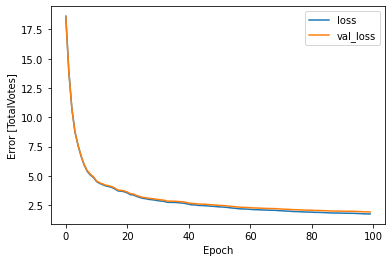

In [27]:
# plot learning curves
pyplot.plot(results['validation_0']['mae'], label='loss')
pyplot.plot(results['validation_1']['mae'], label='val_loss')

pyplot.xlabel('Epoch')
pyplot.ylabel('Error [TotalVotes]')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

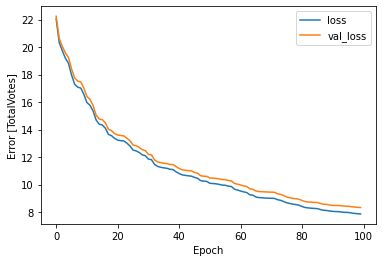

In [33]:
# plot learning curves
pyplot.plot(results_without_usage['validation_0']['mae'], label='loss')
pyplot.plot(results_without_usage['validation_1']['mae'], label='val_loss')

pyplot.xlabel('Epoch')
pyplot.ylabel('Error [TotalVotes]')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [316]:
test_results['xgb_model'] = scores.mean()
test_results['xgb_model_without_usage'] = scores_without_usage.mean()

Mean Squared Error Test results

In [442]:
test_results_MSE['xgb_model'] = scores.mean()
test_results_MSE['xgb_model_without_usage'] = scores_without_usage.mean()

In [34]:
explainer = shap.Explainer(xgb_model, train_features)
shap_values = explainer(test_features)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively 

In [42]:
explainer_without_usage = shap.Explainer(xgb_model_without_usage, train_features_without_usage)
shap_values_without_usage = explainer_without_usage(test_features_without_usage)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively 

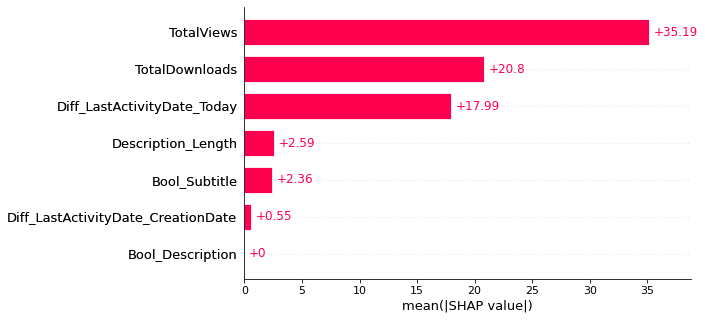

In [35]:
shap.plots.bar(shap_values, max_display=10)

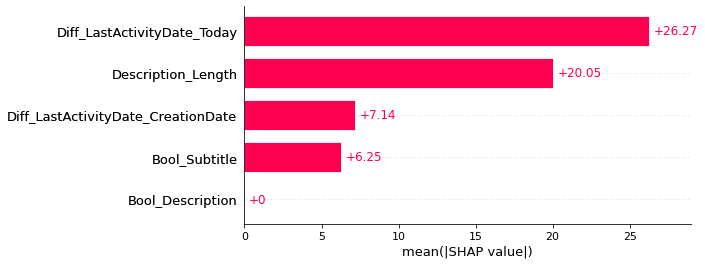

In [43]:
shap.plots.bar(shap_values_without_usage, max_display=10)

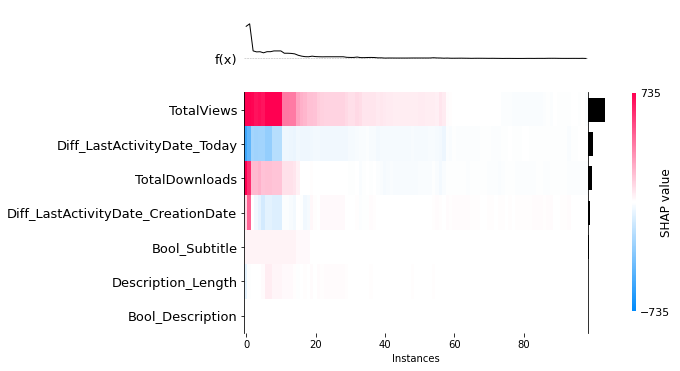

In [37]:
shap.plots.heatmap(shap_values[1:100])

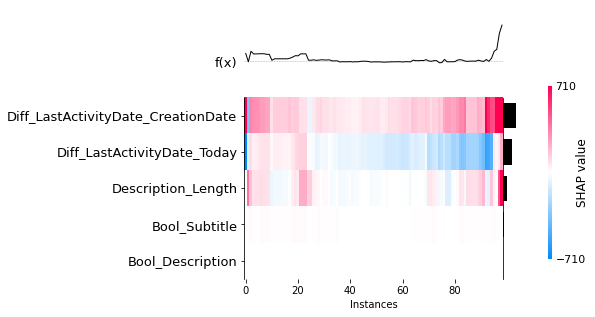

In [44]:
shap.plots.heatmap(shap_values_without_usage[1:100])

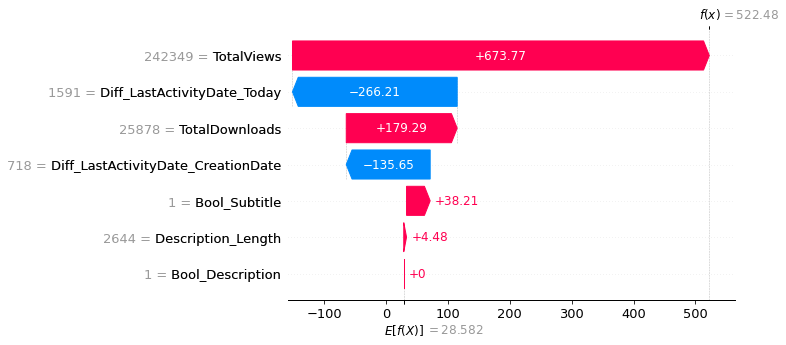

In [38]:
shap.plots.waterfall(shap_values[0])  # For the first observation

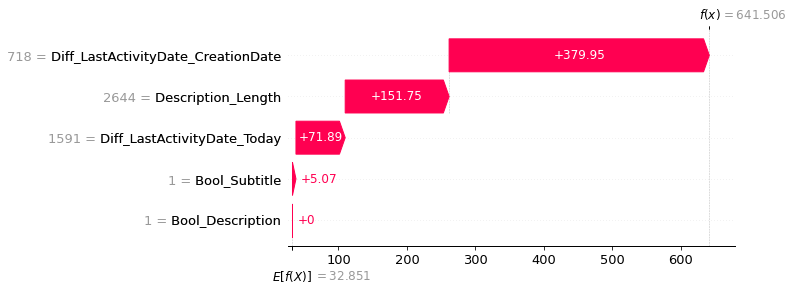

In [45]:
shap.plots.waterfall(shap_values_without_usage[0])  # For the first observation

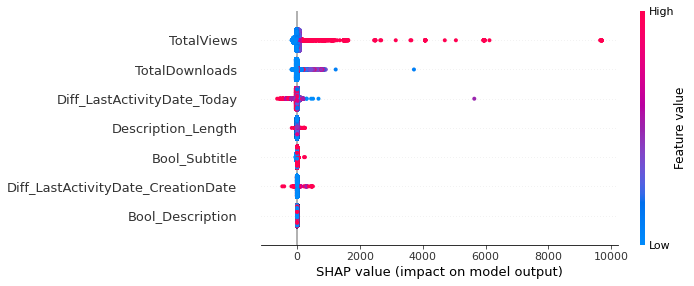

In [40]:
shap.summary_plot(shap_values, test_features)

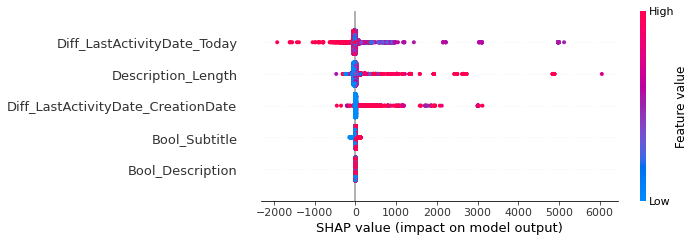

In [47]:
shap.summary_plot(shap_values_without_usage)